Установка необходимых пакетов и импорт библиотек

In [10]:
# !pip install anndata
# !pip install scanpy
# !pip install matplotlib

  Using cached anndata-0.8.0-py3-none-any.whl (96 kB)
  Using cached natsort-8.2.0-py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 374.5 kB/s eta 0:00:0000:0100:01
  Using cached scanpy-1.9.1-py3-none-any.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 731.4 kB/s eta 0:00:0000:0100:01
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached session_info-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 1.4 MB/s eta 0:00:0000:0100:01


  Using cached pynndescent-0.5.8.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached stdlib_list-0.8.0-py3-none-any.whl (63 kB)
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=66b1849d05f6caf34fb836c5c2bac50581973874a95790666f4993c8abf08d82
  Stored in directory: /Users/h1de0us/Library/Caches/pip/wheels/de/b2/e6/f3710dd75722ad40e856825ebdb090021a774e59f07d39bfc6
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8045 sha256=4f03370ce787b3ecb572d6a088b379d465cde74f764d8437d9c63c43d0f37d4d
  Stored in directory: /Users/h1de0us/Library/Caches/pip/wheels/40/db/40/fb25ccbea878514ec7589cf393524aa1225881b6abc89ca334
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55494 sha256=b18ca64658b15670914062fd3201870afd96fbbebe787f1d69748acf6b1bfb6b
  Stored in directory: /Users/h1de0us/Library/Caches/pip/wheels/c9/24/e3/9668804f30023bd253f22a9c37befce9d70a1f6507d7010c42
S

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [8]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

!mkdir data
for gsm, ab in gsm_list:
    url = f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz'
    gz = f'GSM278{gsm}_AB{ab}.txt.gz'
    filename = gz[:-3]
    !wget -c -nv "$url"
    !gzip -f -d "$gz"
    !cp "$filename" data/

2022-12-10 01:14:34 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017_AB1395.txt.gz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2022-12-10 01:14:36 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018_AB1396.txt.gz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2022-12-10 01:14:39 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019_AB1398.txt.gz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2022-12-10 01:14:41 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020_AB1458.txt.gz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2022-12-10 01:14:43 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021_AB1459.txt.gz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2022-12-10 01:14:44 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022_AB1539.txt.gz [348159/348159] -> "GSM2787022_AB1539.txt.

In [9]:
!rm GSM*

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [36]:
import os

counts = pd.DataFrame()
for file in os.listdir('data/'):
    tmp_df = pd.read_csv('data/' + file, sep='\t')
    counts = pd.concat((counts, tmp_df), axis=1)

counts

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [14]:
# choose only cells from the provided file

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G' -O thymus_epithel_clusts.txt

--2022-12-10 01:22:20--  https://docs.google.com/uc?export=download&id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
Resolving docs.google.com (docs.google.com)... 142.250.179.174
Connecting to docs.google.com (docs.google.com)|142.250.179.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i71dhs0n1koeu0tpetf60js3vv15c1b7/1670624475000/01599451123433705475/*/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G?e=download&uuid=d7ffb9ab-1f5c-4d11-8cef-fb4057954214 [following]
--2022-12-10 01:22:21--  https://doc-0k-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i71dhs0n1koeu0tpetf60js3vv15c1b7/1670624475000/01599451123433705475/*/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G?e=download&uuid=d7ffb9ab-1f5c-4d11-8cef-fb4057954214
Resolving doc-0k-2c-docs.googleusercontent.com (doc-0k-2c-docs.googleusercontent.com)... 142.251.36.33
Connecting to doc-0k-2c-docs.googleusercontent.

In [37]:
desired = pd.read_csv('thymus_epithel_clusts.txt', sep='\s', header=0).T
desired_columns = desired.columns
to_drop = []
for col in counts.columns:
    if col not in desired_columns:
        to_drop.append(col)
counts = counts.drop(columns=to_drop)
counts

<ipython-input-37-d94df94579b1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  desired = pd.read_csv('thymus_epithel_clusts.txt', sep='\s', header=0).T


,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
0610007P08Rik,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']


counts = counts.loc[markers]
counts

,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
Ctsl,0,0,0,0,3,1,0,3,5,0,...,6,0,1,0,1,0,0,1,2,1
Psmb11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Prss16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ascl1,4,3,0,0,0,5,0,7,0,0,...,0,0,0,1,0,0,2,4,0,8
Sox4,4,7,2,0,11,6,5,10,0,5,...,3,2,0,2,2,1,1,10,0,5
Ccl21a,2,0,3,0,4,2,1,4,1,0,...,28,0,0,4,1,0,0,5,0,18
Apoe,1,0,0,1,0,0,0,30,3,0,...,11,1,0,5,2,0,0,2,9,5
Ly6a,1,0,1,0,4,0,1,2,0,0,...,40,0,0,0,0,3,0,0,1,2
Ccl21c,5,2,9,1,6,2,0,2,0,0,...,4,0,0,0,0,1,0,3,0,32
Aire,0,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,13,0


In [42]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).


# TPM
sums = counts.sum(axis=0) / 1_000_000
sums = sums.replace(0, 1)
data_normalized = counts.divide(sums, axis=1)
data_normalized.head()

,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
Ctsl,0.000000,0.000000,0.000000,0.0,88235.294118,50000.0,0.000000,43478.260870,68493.150685,0.0,...,59405.940594,0.000000,1000000.0,0.000000,18181.818182,0.000000,0.000000,38461.538462,17241.37931,12658.227848
Psmb11,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,125000.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Prss16,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Ascl1,181818.181818,166666.666667,0.000000,0.0,0.000000,250000.0,0.000000,101449.275362,0.000000,0.0,...,0.000000,0.000000,0.0,76923.076923,0.000000,0.000000,153846.153846,153846.153846,0.00000,101265.822785
Sox4,181818.181818,388888.888889,111111.111111,0.0,323529.411765,300000.0,333333.333333,144927.536232,0.000000,625000.0,...,29702.970297,55555.555556,0.0,153846.153846,36363.636364,35714.285714,76923.076923,384615.384615,0.00000,63291.139241


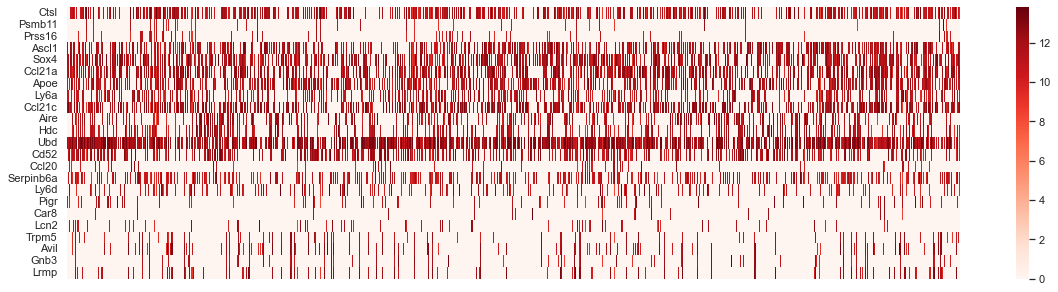

In [43]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

Пока что получилась плохая хитмапа, надо посортировать по меткам кластеров

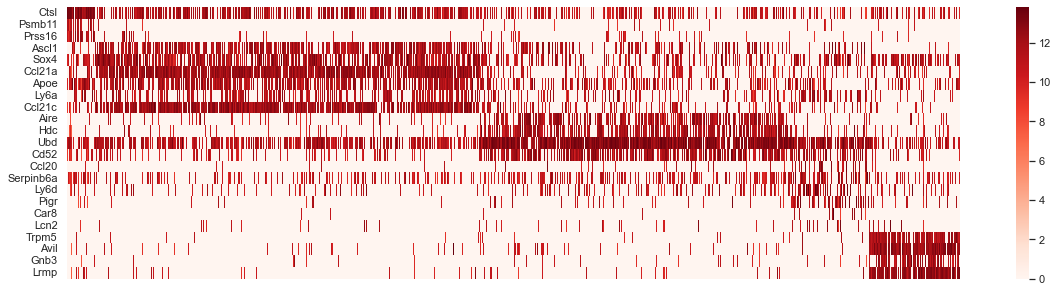

In [82]:
new_columns = [[] for i in range(5)]

# clusters_counts = {}

for col in counts.columns:
    entry = desired.loc['group', col]
#     if entry not in clusters_counts:
#         clusters_counts[entry] = 0
#     clusters_counts[entry] += 1
    if entry.endswith('-I'):
        new_columns[0].append(col)
    elif entry.endswith('-II'):
        new_columns[1].append(col)
    elif entry.endswith('-III'):
        new_columns[2].append(col)
    elif entry.endswith('-IV'):
        new_columns[3].append(col)
    else:
        new_columns[4].append(col)
        
new_columns = new_columns[4] + new_columns[0] + new_columns[1] + new_columns[2] + new_columns[3]
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized.loc[:, new_columns] + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [83]:
# counts_norm - normalized data


counts_norm = data_normalized
adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)
adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]


<ipython-input-83-bc1464d5803f>:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(counts_norm.T)


In [99]:
# add to metadata cell type provided by authors

# cells_type_data = [[key for i in range(value)] for key, value in clusters_counts.items()]
# tmp = []
# for elem in cells_type_data:
#     tmp.extend(elem)
# cells_type_data = tmp.copy()
# len(cells_type_data)

cells_type_data = desired.loc['group', counts_norm.columns].reset_index().to_numpy()[:, 1]
len(cells_type_data)

1486

In [100]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data
adata.obs

,cell_type
Cell_0,mTEC-I
Cell_1,mTEC-I
Cell_2,mTEC-I
Cell_3,mTEC-III
Cell_4,mTEC-I
...,...
Cell_1481,mTEC-II
Cell_1482,mTEC-III
Cell_1483,mTEC-I
Cell_1484,mTEC-II


In [106]:
sc.pp.pca(adata, n_comps=5) # тут было 50, но вылетала ошибка, так что я поставила поменьше 

In [111]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors, ['cTEC', 'mTEC-I', 'mTEC-II', 'mTEC-III', 'mTEC-IV']))

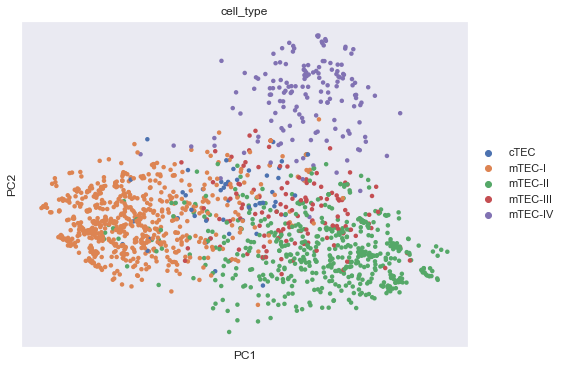

In [112]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)

In [113]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

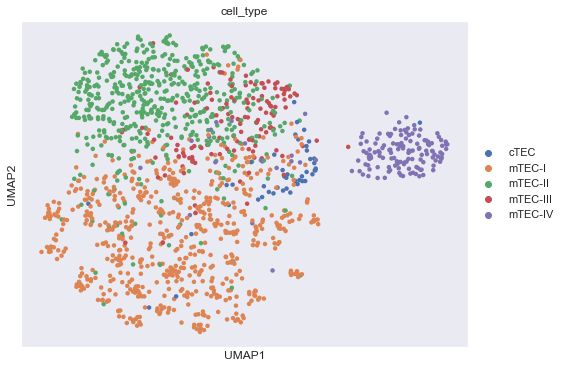

In [115]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors, ['cTEC', 'mTEC-I', 'mTEC-II', 'mTEC-III', 'mTEC-IV']))

f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()